In [3]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np 



In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [5]:
val_prc = 0.1
random_inds = np.arange(train_images.shape[0])
np.random.shuffle(random_inds)
cut_ind = int(train_images.shape[0]*val_prc)

val_images = train_images[random_inds[0:cut_ind]]
val_labels = train_labels[random_inds[0:cut_ind]]
train_images = train_images[random_inds[cut_ind:]]
train_labels = train_labels[random_inds[cut_ind:]]


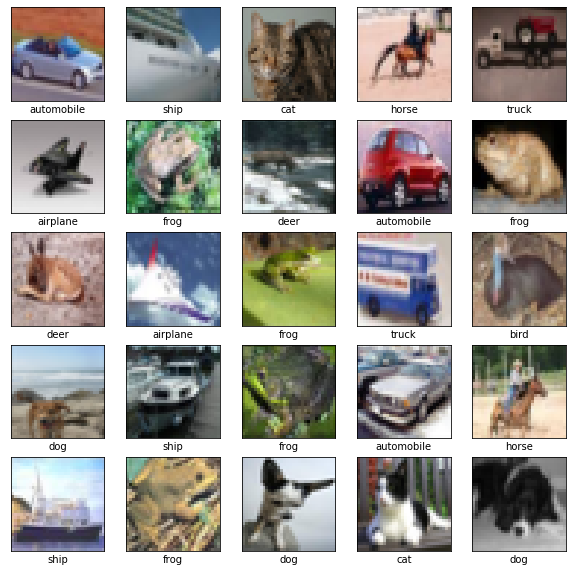

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()



In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))



Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                65600     
__________

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(val_images, val_labels))


Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 9s 197us/sample - loss: 1.5453 - acc: 0.4372 - val_loss: 1.3597 - val_acc: 0.5126
Epoch 2/10
45000/45000 [==============================] - 7s 157us/sample - loss: 1.1591 - acc: 0.5911 - val_loss: 1.1189 - val_acc: 0.6160
Epoch 3/10
45000/45000 [==============================] - 8s 169us/sample - loss: 1.0038 - acc: 0.6446 - val_loss: 1.0007 - val_acc: 0.6570
Epoch 4/10
45000/45000 [==============================] - 8s 167us/sample - loss: 0.9104 - acc: 0.6782 - val_loss: 0.9812 - val_acc: 0.6688
Epoch 5/10
45000/45000 [==============================] - 8s 170us/sample - loss: 0.8453 - acc: 0.7035 - val_loss: 0.9429 - val_acc: 0.6744
Epoch 6/10
45000/45000 [==============================] - 8s 170us/sample - loss: 0.7835 - acc: 0.7252 - val_loss: 0.8981 - val_acc: 0.6984
Epoch 7/10
45000/45000 [==============================] - 7s 163us/sample - loss: 0.7377 - acc: 0.7384 - val_lo

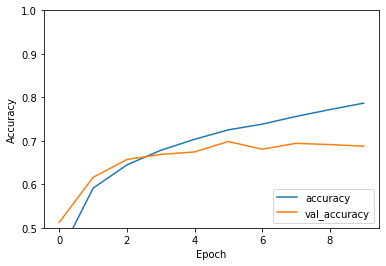

In [10]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)



- 1s - loss: 0.9308 - acc: 0.6926
0.6926
